# 1. Import libraries
import all the modules, functions and objects

In [1]:
# libraries
import pandas
import pylab
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from yellowbrick.model_selection import LearningCurve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.model_selection import learning_curve

# 2. Load Dataset And Cleaning Data
We are goint to use the diabetes dataset from the National Institute of Diabetes and Digestive and Kidney Diseases.
We are using pandas to load the data. We will also use pandas next to explore the data both with descriptive statistics and data visualization.

In [2]:
dataset = pandas.read_csv('diabetes.csv')

In [3]:
df = pandas.read_csv('diabetes.csv')
include = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
dependent_variable = include[-1]
df_ = df[include]

categoricals = []  # going to one-hot encode categorical variables

for col, col_type in df_.dtypes.items():
    if col_type == 'O':
        categoricals.append(col)
    else:
        df_[col].fillna(0, inplace=True)  # fill NA's with 0 for ints/floats, too generic

# get_dummies effectively creates one-hot encoded variables
df_ohe = pandas.get_dummies(df_, columns=categoricals, dummy_na=True)

x = df_ohe[df_ohe.columns.difference([dependent_variable])]
y = df_ohe[dependent_variable]

clf = RandomForestClassifier()

clf.fit(x, y)


message1=""
message2 = 'Model training score: %s' % clf.score(x, y)
return_message = 'Success. \n{0}. \n{1}.'.format(message1, message2) 
print(return_message)


Success. 
. 
Model training score: 0.990885416667.


/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [4]:
diabetes_data_copy = dataset.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_data_copy.isnull().sum())
diabetes_data_copy.head()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Aiming to impute nan values for the columns in accordance with their distribution

In [5]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

In [6]:
# outcome distribution
print(dataset.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


In [7]:
sc_X = StandardScaler()
X =  pandas.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

## 5.1 Create a Validation Dataset
split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

In [8]:
# Split-out validation dataset

#X = array[:,0:4]
Y = diabetes_data_copy.Outcome
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


We now have training data in the X_train and Y_train for preparing models and a X_test and Y_test sets that we can use later.

## 5.3 Build Models
Let’s evaluate the best model:

In [17]:
# Choose the Random Forest classifier. 
clf = RandomForestClassifier()

# Choose some parameter 
#'n_estimators': [6, 8, 9], 
parameters = {'n_estimators': [4, 6, 9], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

# Type of scoring used to compare parameter combinations
#acc_scorer = make_scorer(accuracy_score)

# Run the grid search
#grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
#grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
#clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
#clf.fit(X_train, Y_train)


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
predictions = clf.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.772727272727


In [39]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)  #fit the model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.772727272727


In [48]:
modelKNN = KNeighborsClassifier(n_neighbors = 14)
modelKNN.fit(X_train, Y_train)  #fit the model


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [49]:
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.772727272727


/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/

/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/

/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/

/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/

/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/python3.5/dist-packages/sklearn/neighbors/base.py:420: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  n_jobs = effective_n_jobs(self.n_jobs)
/usr/local/lib/

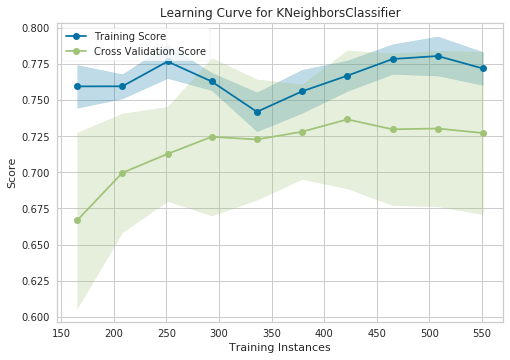

In [52]:
import numpy as np

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve



# Specify the features of interest and the target
#target = "outcome"
#features = [col for col in data.columns if col != target]

# Encode the categorical data with one-hot encoding
#X = pd.get_dummies(data[features])
#y = data[target]

# Create the learning curve visualizer
cv = StratifiedKFold(10)
#cv = KNeighborsClassifier(n_neighbors = 14)
sizes = np.linspace(0.3, 1.0, 10)

viz = LearningCurve(
    KNeighborsClassifier(n_neighbors = 14), cv=cv, train_sizes=sizes,
    scoring='f1_weighted', n_jobs=4
)
#
# Fit and poof the visualizer
viz.fit(X_train, Y_train)
viz.poof()